

# Interrupción Legal del embarazo Enero-Junio 2022

Interrupción legal del embarazo



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [ ]:
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import math
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ILE/diccionario.csv")
df


,Variable,Descripción,Tipo de dato
0,año,Año en que se realizó el procedimiento,numérico
1,mes,Mes en que se realizó el procedimiento,texto
2,clues_hospital,Clave Única de Establecimientos de Salud (CLUES),texto
3,fingreso,Fecha de Interrupción Legal del Embarazo,fecha
4,autoref,Especificar si la paciente es referida de otra...,texto
5,edocivil_descripcion,Estado civil,texto
6,edad,Edad cumplida en años,numérico
7,desc_derechohab,Especificar la institución que otorga la derec...,texto
8,nivel_edu,Último nivel escolar acreditado,texto
9,ocupacion,Ocupación,texto


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ILE/ile.csv")
#df.drop(['uso_anticonceptivo','fecha_primera_valoracion','fecha_ingreso_hosp','referida','parentesco','fecha_ultima_menstruacion','fecha_egreso_hosp','desc_servicio','dias_gestacion_usg','firma_consentimiento','analgesico','con_dolor','anticonceptivo_post','fecha_cierre','resultado_ile'],axis=1)
df=df[["año",'mes','fecha_ingreso','estado_civil','edad','nivel_edu','ocupacion','religion','entidad','edad_inicio_vida_sexual','semanas_embarazo','numero_hijos','numero_embarazos','numero_abortos','numero_iles','se_complica','procedimiento_ile']]
df.head()

,año,mes,fecha_ingreso,estado_civil,edad,nivel_edu,ocupacion,religion,entidad,edad_inicio_vida_sexual,semanas_embarazo,numero_hijos,numero_embarazos,numero_abortos,numero_iles,se_complica,procedimiento_ile
0,2022,ENERO,2022-01-04,CASADA,36,PREPARATORIA,TRABAJADORA DEL HOGAR NO REMUNERADA,CATOLICA,CIUDAD DE MEXICO,NaN,9.0,5.0,6.0,0.0,0.0,NO,MEDICAMENTO
1,2022,ENERO,2022-01-03,CASADA,21,PREPARATORIA,DESEMPLEADA,CATOLICA,ESTADO DE MEXICO,17.0,6.0,0.0,2.0,0.0,1.0,NO,MEDICAMENTO
2,2022,ENERO,2022-01-03,SOLTERA,22,PREPARATORIA,EMPLEADA,NINGUNA,CIUDAD DE MEXICO,16.0,7.0,2.0,0.0,1.0,1.0,NO,MEDICAMENTO
3,2022,ENERO,2022-01-03,SOLTERA,21,PREPARATORIA,ESTUDIANTE,NINGUNA,CIUDAD DE MEXICO,19.0,8.0,0.0,1.0,0.0,0.0,NO,MEDICAMENTO
4,2022,ENERO,2022-01-03,SOLTERA,21,SECUNDARIA,DESEMPLEADA,NINGUNA,CIUDAD DE MEXICO,12.0,10.0,1.0,2.0,0.0,0.0,NO,MEDICAMENTO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6343 entries, 0 to 6342
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   año                      6343 non-null   int64  
 1   mes                      6343 non-null   object 
 2   fecha_ingreso            6343 non-null   object 
 3   estado_civil             6210 non-null   object 
 4   edad                     6343 non-null   int64  
 5   nivel_edu                6204 non-null   object 
 6   ocupacion                4502 non-null   object 
 7   religion                 6067 non-null   object 
 8   entidad                  6343 non-null   object 
 9   edad_inicio_vida_sexual  6033 non-null   float64
 10  semanas_embarazo         6087 non-null   float64
 11  numero_hijos             5942 non-null   float64
 12  numero_embarazos         6054 non-null   float64
 13  numero_abortos           5785 non-null   float64
 14  numero_iles             

In [ ]:
df.columns

Index(['año', 'mes', 'fecha_ingreso', 'estado_civil', 'edad', 'nivel_edu',
       'ocupacion', 'religion', 'entidad', 'edad_inicio_vida_sexual',
       'semanas_embarazo', 'numero_hijos', 'numero_embarazos',
       'numero_abortos', 'numero_iles', 'se_complica', 'procedimiento_ile'],
      dtype='object')

In [ ]:
df=df[df["semanas_embarazo"]>0]
df

,año,mes,fecha_ingreso,estado_civil,edad,nivel_edu,ocupacion,religion,entidad,edad_inicio_vida_sexual,semanas_embarazo,numero_hijos,numero_embarazos,numero_abortos,numero_iles,se_complica,procedimiento_ile
0,2022,ENERO,2022-01-04,CASADA,36,PREPARATORIA,TRABAJADORA DEL HOGAR NO REMUNERADA,CATOLICA,CIUDAD DE MEXICO,NaN,9.0,5.0,6.0,0.0,0.0,NO,MEDICAMENTO
1,2022,ENERO,2022-01-03,CASADA,21,PREPARATORIA,DESEMPLEADA,CATOLICA,ESTADO DE MEXICO,17.0,6.0,0.0,2.0,0.0,1.0,NO,MEDICAMENTO
2,2022,ENERO,2022-01-03,SOLTERA,22,PREPARATORIA,EMPLEADA,NINGUNA,CIUDAD DE MEXICO,16.0,7.0,2.0,0.0,1.0,1.0,NO,MEDICAMENTO
3,2022,ENERO,2022-01-03,SOLTERA,21,PREPARATORIA,ESTUDIANTE,NINGUNA,CIUDAD DE MEXICO,19.0,8.0,0.0,1.0,0.0,0.0,NO,MEDICAMENTO
4,2022,ENERO,2022-01-03,SOLTERA,21,SECUNDARIA,DESEMPLEADA,NINGUNA,CIUDAD DE MEXICO,12.0,10.0,1.0,2.0,0.0,0.0,NO,MEDICAMENTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,2022,JUNIO,2022-06-30,SOLTERA,22,SECUNDARIA,DESEMPLEADA,CATOLICA,CIUDAD DE MEXICO,17.0,9.0,1.0,2.0,0.0,0.0,SI,MEDICAMENTO
6325,2022,JUNIO,2022-06-30,UNION LIBRE,26,SECUNDARIA,NaN,CATOLICA,CIUDAD DE MEXICO,16.0,7.0,2.0,3.0,0.0,0.0,SI,MEDICAMENTO
6326,2022,JUNIO,2022-06-30,UNION LIBRE,20,PREPARATORIA,NaN,CATOLICA,CIUDAD DE MEXICO,16.0,10.0,1.0,3.0,0.0,1.0,SI,ASPIRACIÓN ENDOUTERINA (MANUAL O ELÉCTRICA)
6327,2022,JUNIO,2022-06-30,SOLTERA,21,PREPARATORIA,ESTUDIANTE,NINGUNA,ESTADO DE MEXICO,18.0,15.0,0.0,1.0,0.0,0.0,SI,MEDICAMENTO


In [ ]:
df['estado_civil'].dropna
df['nivel_edu'].dropna()
df['edad_inicio_vida_sexual'].dropna()
df['semanas_embarazo'].dropna()
df['numero_hijos'].dropna()
df['numero_embarazos'].dropna()
df['numero_abortos'].dropna()
df['numero_iles'].dropna()
df['ocupacion']=np.where(df['ocupacion'].isnull(),"OTRO",df['ocupacion'])
df['religion']=np.where(df['religion'].isnull(),df['religion'].mode(),df['religion'])
df['se_complica']=np.where(df['se_complica'].isnull(),df['se_complica'].mode(),df['se_complica'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 6328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   año                      5863 non-null   int64  
 1   mes                      5863 non-null   object 
 2   fecha_ingreso            5863 non-null   object 
 3   estado_civil             5787 non-null   object 
 4   edad                     5863 non-null   int64  
 5   nivel_edu                5764 non-null   object 
 6   ocupacion                5863 non-null   object 
 7   religion                 5863 non-null   object 
 8   entidad                  5863 non-null   object 
 9   edad_inicio_vida_sexual  5787 non-null   float64
 10  semanas_embarazo         5863 non-null   float64
 11  numero_hijos             5763 non-null   float64
 12  numero_embarazos         5806 non-null   float64
 13  numero_abortos           5678 non-null   float64
 14  numero_iles             

In [ ]:
df.describe()

,año,edad,edad_inicio_vida_sexual,semanas_embarazo,numero_hijos,numero_embarazos,numero_abortos,numero_iles
count,5863.0,5863.000000,5787.000000,5863.000000,5763.000000,5806.000000,5678.000000,5858.000000
mean,2022.0,26.235033,16.746155,7.333959,0.947770,2.270582,0.206763,0.193240
std,0.0,6.220394,2.226234,2.094578,1.093453,1.342085,0.535717,0.474598
min,2022.0,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,22.000000,15.000000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,2022.0,25.000000,17.000000,7.000000,1.000000,2.000000,0.000000,0.000000
75%,2022.0,30.000000,18.000000,9.000000,2.000000,3.000000,0.000000,0.000000
max,2022.0,47.000000,34.000000,19.000000,8.000000,10.000000,6.000000,7.000000


In [ ]:
import datetime as dt
df['fecha_ingreso']=pd.to_datetime(df['fecha_ingreso'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 6328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   año                      5863 non-null   int64         
 1   mes                      5863 non-null   object        
 2   fecha_ingreso            5863 non-null   datetime64[ns]
 3   estado_civil             5787 non-null   object        
 4   edad                     5863 non-null   int64         
 5   nivel_edu                5764 non-null   object        
 6   ocupacion                5863 non-null   object        
 7   religion                 5863 non-null   object        
 8   entidad                  5863 non-null   object        
 9   edad_inicio_vida_sexual  5787 non-null   float64       
 10  semanas_embarazo         5863 non-null   float64       
 11  numero_hijos             5763 non-null   float64       
 12  numero_embarazos         5806 non-

In [ ]:
df.head()

,año,mes,fecha_ingreso,estado_civil,edad,nivel_edu,ocupacion,religion,entidad,edad_inicio_vida_sexual,semanas_embarazo,numero_hijos,numero_embarazos,numero_abortos,numero_iles,se_complica,procedimiento_ile
0,2022,ENERO,2022-01-04,CASADA,36,PREPARATORIA,TRABAJADORA DEL HOGAR NO REMUNERADA,CATOLICA,CIUDAD DE MEXICO,NaN,9.0,5.0,6.0,0.0,0.0,NO,MEDICAMENTO
1,2022,ENERO,2022-01-03,CASADA,21,PREPARATORIA,DESEMPLEADA,CATOLICA,ESTADO DE MEXICO,17.0,6.0,0.0,2.0,0.0,1.0,NO,MEDICAMENTO
2,2022,ENERO,2022-01-03,SOLTERA,22,PREPARATORIA,EMPLEADA,NINGUNA,CIUDAD DE MEXICO,16.0,7.0,2.0,0.0,1.0,1.0,NO,MEDICAMENTO
3,2022,ENERO,2022-01-03,SOLTERA,21,PREPARATORIA,ESTUDIANTE,NINGUNA,CIUDAD DE MEXICO,19.0,8.0,0.0,1.0,0.0,0.0,NO,MEDICAMENTO
4,2022,ENERO,2022-01-03,SOLTERA,21,SECUNDARIA,DESEMPLEADA,NINGUNA,CIUDAD DE MEXICO,12.0,10.0,1.0,2.0,0.0,0.0,NO,MEDICAMENTO


In [ ]:
df['estado_civil'].dropna()
df['mes'].unique()
#df.ocupacion.unique()

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO'],
      dtype=object)

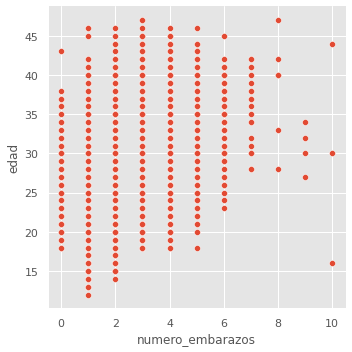

In [57]:
fig1= sns.relplot(data=df, y="edad", x="numero_embarazos")

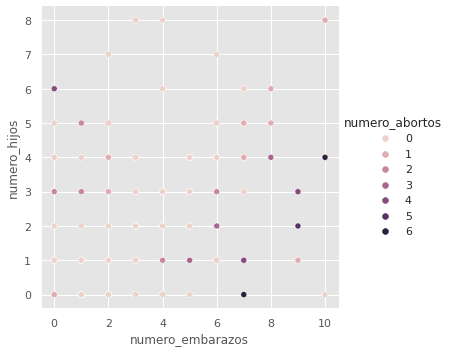

In [ ]:
sns.relplot(data=df, y="numero_hijos", x="numero_embarazos",hue="numero_abortos")

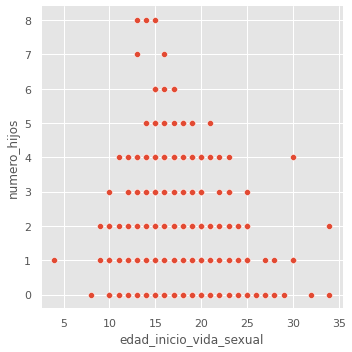

In [ ]:
sns.relplot(data=df, y="numero_hijos", x="edad_inicio_vida_sexual")

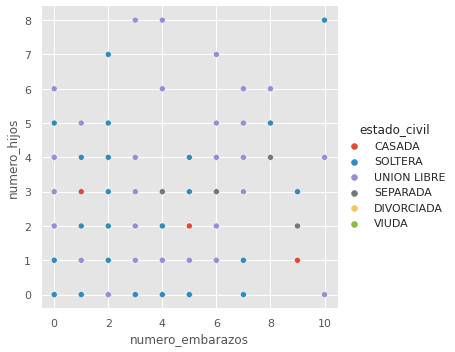

In [ ]:
sns.relplot(data=df, y="numero_hijos", x="numero_embarazos",hue='estado_civil')

In [ ]:

fig = px.histogram(df, x='procedimiento_ile', title='Tipo de procedimiento ILE',labels={'procedimiento_ile':'Procedimiento'})
fig.show()

In [ ]:
fig = px.histogram(df, x='edad_inicio_vida_sexual', title='Edad de inicio de vida sexual',labels={'edad_inicio_vida_sexual':'Edad'})
fig.show()

In [ ]:
fig = px.histogram(df, x='edad', title='Mujeres que abortaron por grupo de edad',labels={'edad':'Edad'})
fig.show()

In [ ]:
fig = px.histogram(df, x='nivel_edu', title='Conteo de mujeres por nivel educativo',labels={'nivel_edu':'Nivel educativo'})
fig.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 6328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   año                      5863 non-null   int64         
 1   mes                      5863 non-null   object        
 2   fecha_ingreso            5863 non-null   datetime64[ns]
 3   estado_civil             5787 non-null   object        
 4   edad                     5863 non-null   int64         
 5   nivel_edu                5764 non-null   object        
 6   ocupacion                5863 non-null   object        
 7   religion                 5863 non-null   object        
 8   entidad                  5863 non-null   object        
 9   edad_inicio_vida_sexual  5787 non-null   float64       
 10  semanas_embarazo         5863 non-null   float64       
 11  numero_hijos             5763 non-null   float64       
 12  numero_embarazos         5806 non-

In [ ]:
fig = px.histogram(df, x="edad", color="procedimiento_ile",
                 #  marginal="rug", # or violin, rug
                   hover_data=df.columns,title="Procedimiento ILE por edad ")
fig

In [ ]:
fig = px.histogram(df, x="edad", color="se_complica",
                 #  marginal="rug", # or violin, rug
                   hover_data=df.columns,title="Complicaciones ILE por edad ")
fig

In [ ]:
fig1 = px.histogram(df, x='religion', title='Conteo de mujeres por religión',labels={'religion':'Religión'})
fig1.show()

In [ ]:
fig1 = px.histogram(df, x='se_complica', title='Presencia de complicaciones durante el procedimiento',labels={'se_complica':'Se complica'})
fig1.show()

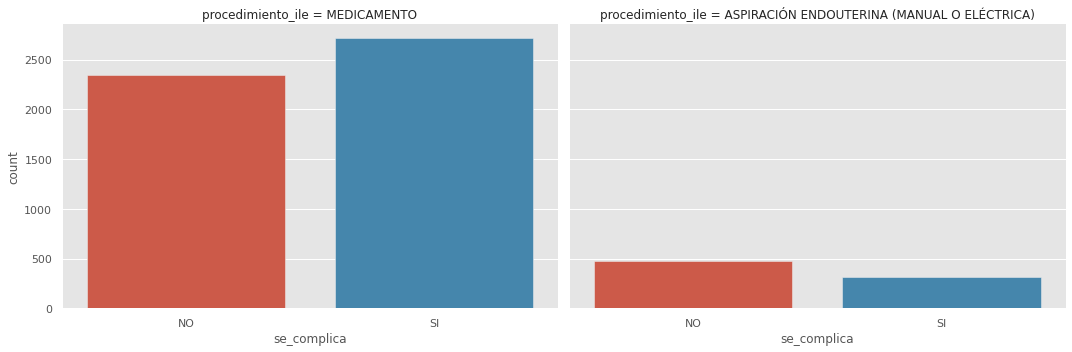

In [ ]:
order = df['procedimiento_ile'].value_counts().index # order the columns from highest count to lowest.
g = sns.catplot(x="se_complica",
            col='procedimiento_ile',
            col_order=order,
            kind="count", data=df,
            aspect=1.5)

In [ ]:
fig1 = px.histogram(df, x='semanas_embarazo', title='Semanas de embarazo al realizar ILE',labels={'semanas_embarazo':'Semanas de embarazo'})
fig1.show()

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 6328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   año                      5863 non-null   int64         
 1   mes                      5863 non-null   object        
 2   fecha_ingreso            5863 non-null   datetime64[ns]
 3   estado_civil             5787 non-null   object        
 4   edad                     5863 non-null   int64         
 5   nivel_edu                5764 non-null   object        
 6   ocupacion                5863 non-null   object        
 7   religion                 5863 non-null   object        
 8   entidad                  5863 non-null   object        
 9   edad_inicio_vida_sexual  5787 non-null   float64       
 10  semanas_embarazo         5863 non-null   float64       
 11  numero_hijos             5763 non-null   float64       
 12  numero_embarazos         5806 non-

In [ ]:
df1=df[['fecha_ingreso','numero_abortos']]
df1 = df1.set_index(['fecha_ingreso'])
df1

,numero_abortos
fecha_ingreso,
2022-01-04,0.0
2022-01-03,0.0
2022-01-03,1.0
2022-01-03,0.0
2022-01-03,0.0
...,...
2022-06-30,0.0
2022-06-30,0.0
2022-06-30,0.0


In [ ]:
df1['numero_abortos'] = pd.to_numeric(df1.numero_abortos, errors='coerce')
df1.dropna(inplace=True)
df1_m = df1.copy()
df1_m['month'] = [i.month for i in df1_m.index]
df1_m['day'] = [i.day for i in df1_m.index]
# group by month and year, get the average
df1_m = df1_m.groupby(['month','day']).mean()
df1_m

numero_abortos
month day                
1     3          0.173913
      4          0.139535
      5          0.285714
      6          0.545455
      7          0.142857
...                   ...
6     25         0.100000
      26         0.142857
      28         0.205882
      29         0.120000
      30         0.146341

[173 rows x 1 columns]

In [ ]:
df1_m = df1_m.unstack(level=0)
df1_m

numero_abortos                                                  
month              1         2         3         4         5         6
day                                                                   
1                NaN  0.203704  0.240000  0.225806  0.000000  0.210526
2                NaN  0.173913  0.185185  0.176471  0.180000  0.175000
3           0.173913  0.119048  0.256410  0.062500  0.117647  0.260000
4           0.139535  0.188679  0.163265  0.208333  0.194444  0.000000
5           0.285714  0.000000  0.181818  0.222222  0.136364  0.200000
6           0.545455       NaN  0.090909  0.239130  0.177778  0.351351
7           0.142857  0.000000  0.261905  0.130435  0.214286  0.052632
8           0.200000  0.204082  0.482143  0.375000  0.187500  0.121951
9           0.000000  0.192982  0.142857  0.176471  0.195652  0.128205
10          0.068182  0.153846  0.276596  0.235294  0.206897  0.210526
11          0.189655  0.140351  0.152174  0.210526  0.210526  0.200000
12          0.409091  0.000000  0.058824  0.314286  0.028571  0.250000
13          0.176471  0.000000  0.000000  0.129630  0.166667  0.200000
14          0.303571  0.148936  0.111111  0.100000  0.318182  0.090909
15          0.500000  0.265306  0.365385  1.000000  0.055556  0.147059
16               NaN  0.153846  0.121951  0.312500  0.282609  0.285714
17          0.125000  0.215686  0.421053  0.142857  0.416667  0.062500
18          0.103448  0.310345  0.233333  0.178571  0.289474  0.142857
19          0.279070  0.000000  0.550000  0.409091  0.176471  0.000000
20          0.250000  0.000000  0.238095  0.173077  0.268293  0.166667
21          0.239130  0.096774  0.181818  0.215686  0.529412  0.200000
22               NaN  0.395349  0.413793  0.115385  0.052632  0.081081
23          0.000000  0.142857  0.265306       NaN  0.098039  0.114286
24          0.250000  0.190476  0.302326       NaN  0.289474  0.148649
25          0.096774  0.100000  0.250000  0.172414  0.263158  0.100000
26          0.145833  0.166667  0.411765  0.129032  0.228571  0.142857
27          0.324324  0.285714  0.250000  0.191489  0.063830       NaN
28          0.057692  0.236842  0.419355  0.363636  0.000000  0.205882
29          0.000000       NaN  0.162791  0.271186  0.000000  0.120000
30          0.000000       NaN  0.162162  0.125000  0.194444  0.146341
31          0.186047       NaN  0.228571       NaN  0.312500       NaN

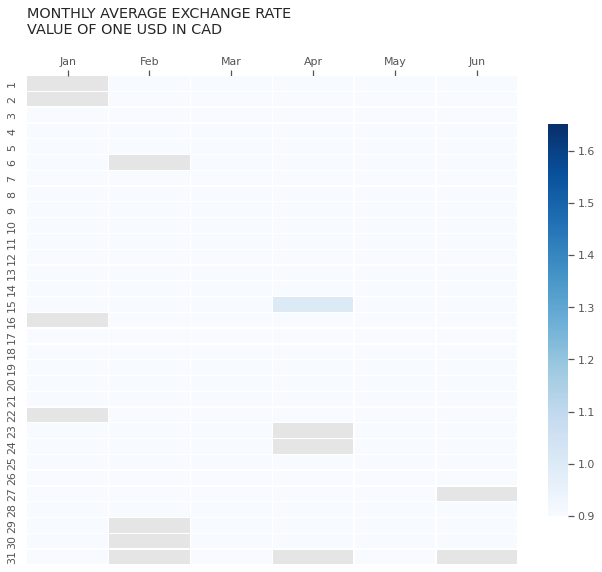

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(df1_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
plt.xticks(np.arange(6) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')


plt.show()



In [ ]:
df.dropna(inplace=True)
fig = px.treemap(df, 
                 path=['estado_civil', 'ocupacion'], 
                 values='numero_embarazos',
                 
                )
fig.show()

In [ ]:
df.head()

,año,mes,fecha_ingreso,estado_civil,edad,nivel_edu,ocupacion,religion,entidad,edad_inicio_vida_sexual,semanas_embarazo,numero_hijos,numero_embarazos,numero_abortos,numero_iles,se_complica,procedimiento_ile
1,2022,ENERO,2022-01-03,CASADA,21,PREPARATORIA,DESEMPLEADA,CATOLICA,ESTADO DE MEXICO,17.0,6.0,0.0,2.0,0.0,1.0,NO,MEDICAMENTO
2,2022,ENERO,2022-01-03,SOLTERA,22,PREPARATORIA,EMPLEADA,NINGUNA,CIUDAD DE MEXICO,16.0,7.0,2.0,0.0,1.0,1.0,NO,MEDICAMENTO
3,2022,ENERO,2022-01-03,SOLTERA,21,PREPARATORIA,ESTUDIANTE,NINGUNA,CIUDAD DE MEXICO,19.0,8.0,0.0,1.0,0.0,0.0,NO,MEDICAMENTO
4,2022,ENERO,2022-01-03,SOLTERA,21,SECUNDARIA,DESEMPLEADA,NINGUNA,CIUDAD DE MEXICO,12.0,10.0,1.0,2.0,0.0,0.0,NO,MEDICAMENTO
5,2022,ENERO,2022-01-03,SOLTERA,26,LICENCIATURA,EMPLEADA,CATOLICA,CIUDAD DE MEXICO,14.0,9.0,0.0,2.0,0.0,1.0,NO,MEDICAMENTO


In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 9.4 MB/s 
     |████████████████████████████████| 1.6 MB 34.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=6e2fbf1c03854873b0e796d2c949e67debacf2b5939356dc4d2f659298c95616
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import dash
from dash import dcc # Dash core components
import dash_html_components as html
from jupyter_dash import JupyterDash

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [61]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
colors = {
    'background': '#111111',
    'text': '#7FDBFF' # #252c94
}
fig = px.histogram(df, x="edad", color="se_complica",
                 #  marginal="rug", # or violin, rug
                   hover_data=df.columns,title="Complicaciones ILE por edad ")

app.layout = html.Div(children=[
    html.H1(children='Complicaciones ILE'), # <h1>Ventas de Frutas</h1>
   # html.H2(children='Subdivisión por países'),

    html.Div(children='''
        Complicaciones por edad al realizar ILE
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    ),
    html.Div(children='''
         Scatter de Ventas.
    '''),
    dcc.Graph(
        id='example-graph2',
        figure=fig2
    )
])
app.run_server(mode='inline') #tambien se puede modo externo
app.run_server(debug=True)

<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>